In [26]:
!pip install alerce

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from alerce.core import Alerce
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import viridis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from datetime import datetime

In [3]:
from scipy import stats
from sklearn import datasets

In [4]:
from alerce.core import Alerce
client = Alerce()

In [30]:
!pip install psycopg2-binary

In [5]:
import psycopg2

In [6]:
import requests
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()['params']

In [7]:
print(params)

{'dbname': 'ztf', 'user': 'alerceread', 'host': '54.205.99.47', 'password': 'w*C*u8AXZ4e%d+zv'}


In [8]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [35]:
type(conn)

psycopg2.extensions.connection

In [9]:
query = """
SELECT table_name  FROM information_schema.tables
WHERE table_schema='alerce'
ORDER BY table_name;
"""
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="table_name")

C:\Users\Acer\AppData\Local\Temp\ipykernel_904\2807366653.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql_query(query, conn)


table_name
0                    allwise
1                dataquality
2                  detection
3                    feature
4            feature_version
5                   gaia_ztf
6              lc_classifier
7     lc_classifier_periodic
8   lc_classifier_stochastic
9          lc_classifier_top
10   lc_classifier_transient
11                   magstat
12             non_detection
13                    object
14                   outlier
15                  pipeline
16               probability
17                   ps1_ztf
18                 reference
19                    ss_ztf
20          stamp_classifier
21                      step
22                  taxonomy
23                    xmatch

In [10]:
alltabs = []
for tab in sorted(tables.table_name):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

C:\Users\Acer\AppData\Local\Temp\ipykernel_904\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_904\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_904\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_904\332238241.py:5: UserWarning: pan

table         column_name          data_type
0                    allwise        k_msig_2mass   double precision
1                    allwise                  ra   double precision
2                    allwise                 dec   double precision
3                    allwise              w1mpro   double precision
4                    allwise              w2mpro   double precision
5                    allwise              w3mpro   double precision
6                    allwise              w4mpro   double precision
7                    allwise           w1sigmpro   double precision
8                    allwise           w2sigmpro   double precision
9                    allwise           w3sigmpro   double precision
10                   allwise           w4sigmpro   double precision
11                   allwise           j_m_2mass   double precision
12                   allwise           h_m_2mass   double precision
13                   allwise           k_m_2mass   double precision
14                   allwise        j_msig_2mass   double precision
15                   allwise        h_msig_2mass   double precision
16                   allwise         oid_catalog  character varying
0                dataquality             exptime               real
1                dataquality              candid             bigint
2                dataquality                 fid            integer
3                dataquality                xpos               real
4                dataquality                ypos               real
5                dataquality              chipsf               real
6                dataquality                 sky               real
7                dataquality                fwhm               real
8                dataquality            classtar               real
9                dataquality          mindtoedge               real
10               dataquality            seeratio               real
11               dataquality              aimage               real
12               dataquality              bimage               real
13               dataquality           aimagerat               real
14               dataquality           bimagerat               real
15               dataquality                nneg            integer
16               dataquality                nbad            integer
17               dataquality              sumrat               real
18               dataquality               scorr   double precision
19               dataquality              dsnrms               real
20               dataquality              ssnrms               real
21               dataquality            magzpsci               real
22               dataquality         magzpsciunc               real
23               dataquality         magzpscirms               real
24               dataquality            nmatches            integer
25               dataquality            clrcoeff               real
26               dataquality            clrcounc               real
27               dataquality            zpclrcov               real
28               dataquality               zpmed               real
29               dataquality              clrmed               real
30               dataquality              clrrms               real
31               dataquality                 oid  character varying
0                  detection             dubious            boolean
1                  detection       parent_candid             bigint
2                  detection           has_stamp            boolean
3                  detection                 fid            integer
4                  detection                 pid             bigint
5                  detection          diffmaglim               real
6                  detection           isdiffpos           smallint
7                  detection                 nid            integer
8                  detection                  ra   double precision
9          

In [11]:
import os
import glob

ruta_carpeta = "C:/Users/Acer/Desktop/ramos/5° Semestre/Astroinformática/Trabajo Grupal/datos/datos_asteroids"  # Ruta de la carpeta que contiene los archivos

archivos = glob.glob(os.path.join(ruta_carpeta, "*.txt"))

design_aster = []
magn_abs = []
prop_semi_maj_ax = []
prop_ecc = []
sin_prop_incl = []
id_familia = []

for archivo in archivos:
    with open(archivo, "r") as archivo_actual:
        lineas = archivo_actual.readlines()

        for linea in lineas:
            valores = linea.strip().split()  
            
            design_aster.append(valores[0])
            magn_abs.append(valores[1])
            prop_semi_maj_ax.append(valores[2])
            prop_ecc.append(valores[3])
            sin_prop_incl.append(valores[4])
            id_familia.append(valores[5])
 

In [87]:
import pandas as pd
data = {
    'design_aster': design_aster,
    'magn_abs': magn_abs,
    'prop_semi_maj_ax': prop_semi_maj_ax,
    'prop_ecc': prop_ecc,
    'sin_prop_incl': sin_prop_incl,
    'id_familia': id_familia
}

df = pd.DataFrame(data)
# Tu DataFrame original con las columnas [numero, caracteristica1, caracteristica2, caracteristica3, caracteristica4, id_familia]
df_original = df # Inserta aquí tu DataFrame original

# Agrupar por la columna "id_familia" y seleccionar los primeros 1000 registros de cada grupo
df_nuevos_asteroides = df_original.groupby('id_familia').apply(lambda x: x.head(10000))

# Restablecer el índice del nuevo DataFrame
df_nuevos_asteroides.reset_index(drop=True, inplace=True)

# Imprimir el nuevo DataFrame con los 1000 asteroides por familia
print(df_nuevos_asteroides)


       design_aster magn_abs prop_semi_maj_ax  prop_ecc sin_prop_incl  \
0                10     5.48         3.141802  0.135780      0.088953   
1               100     7.68         3.094570  0.150107      0.091265   
2               211     7.98         3.044257  0.150752      0.085849   
3               108     8.03         3.220964  0.106152      0.083607   
4               159     8.35         3.104241  0.117101      0.089714   
...             ...      ...              ...       ...           ...   
249263     2020SU45    17.89         3.047768  0.183902      0.286128   
249264     2020MF26    17.97         3.066623  0.185450      0.282269   
249265     2019GS76    18.00         3.058512  0.185232      0.290606   
249266    2016AL134    18.02         3.068623  0.180955      0.284077   
249267    2015KD206    18.04         3.041076  0.187278      0.283841   

       id_familia  
0              10  
1              10  
2              10  
3              10  
4              10  
...

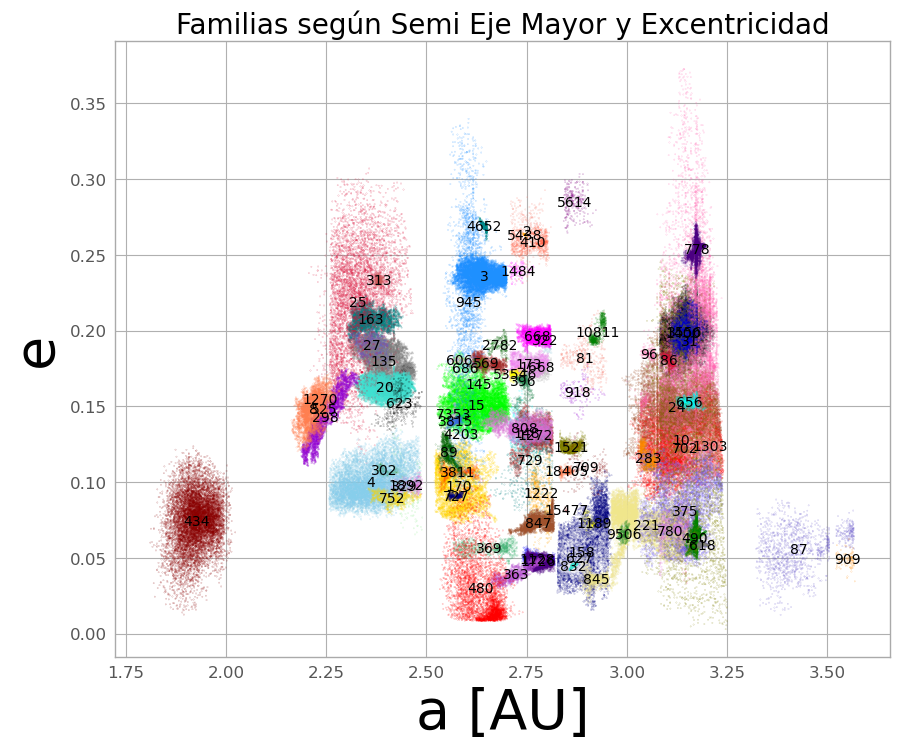

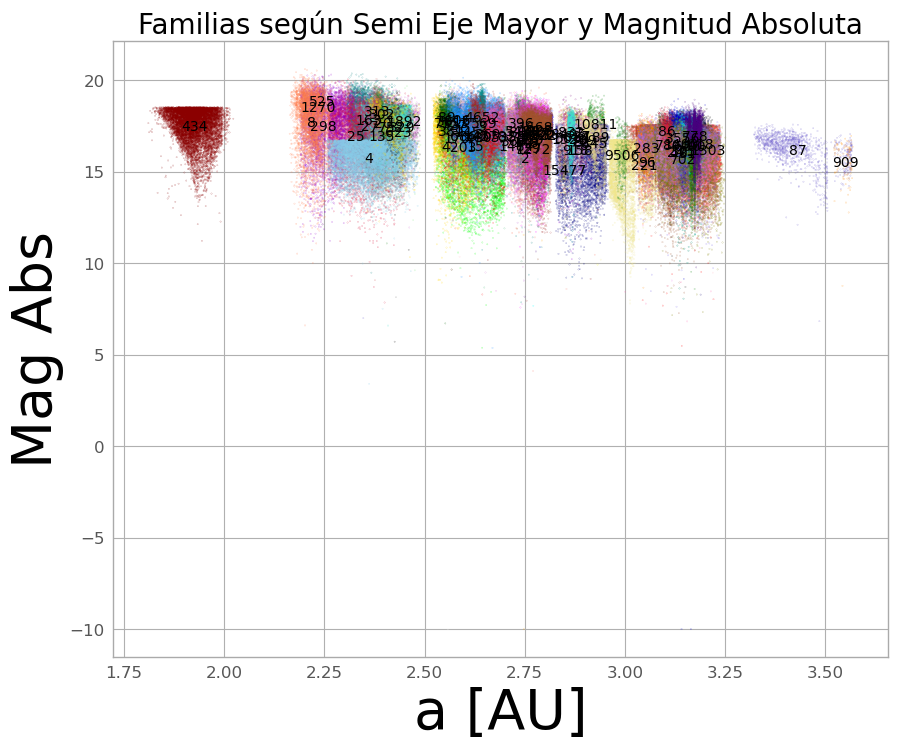

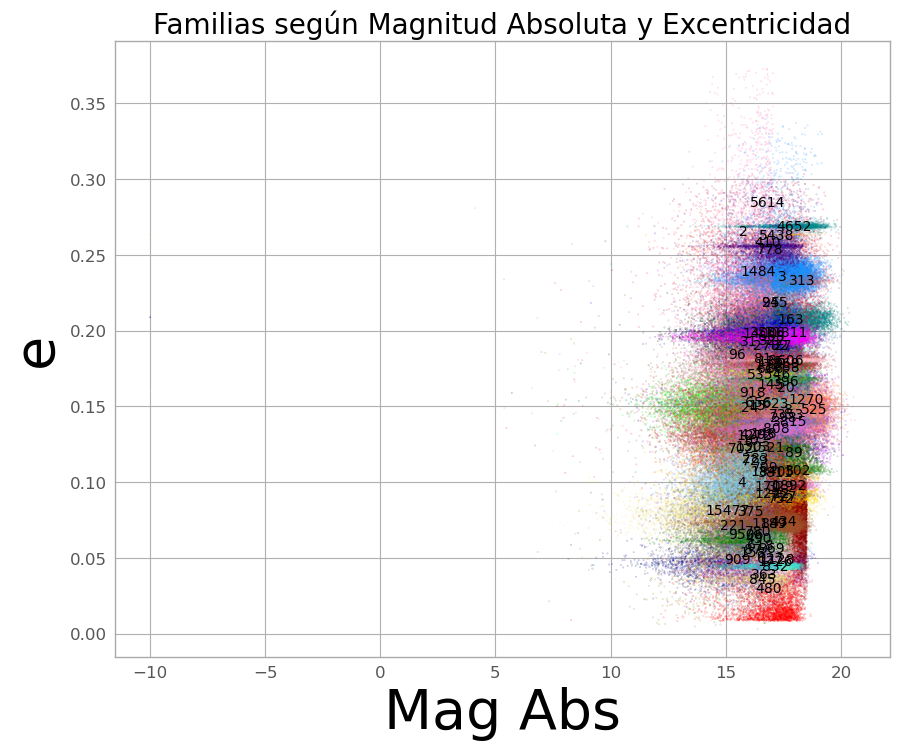

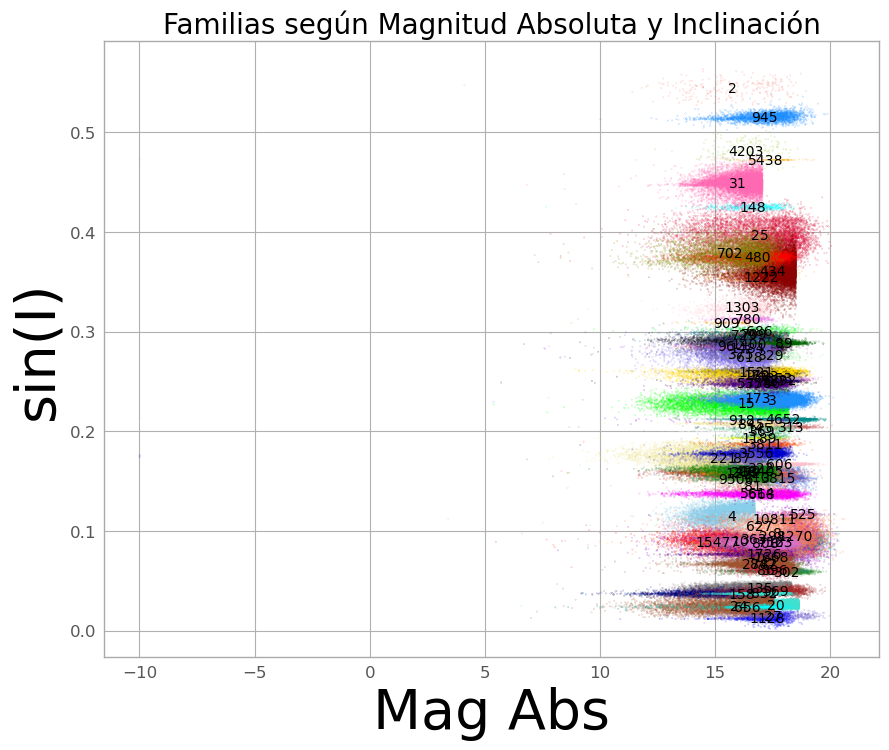

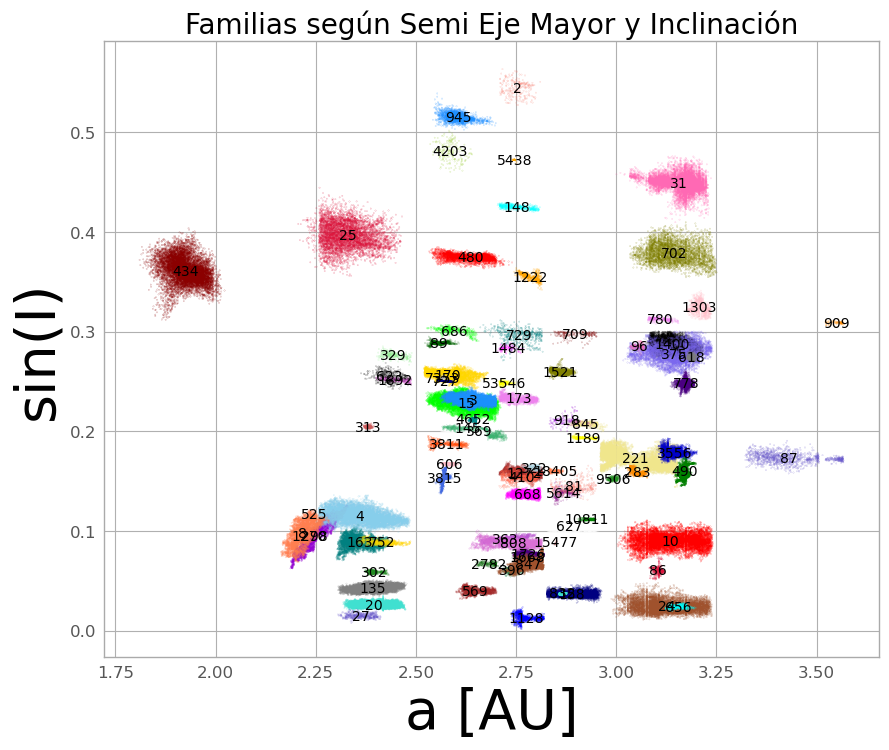

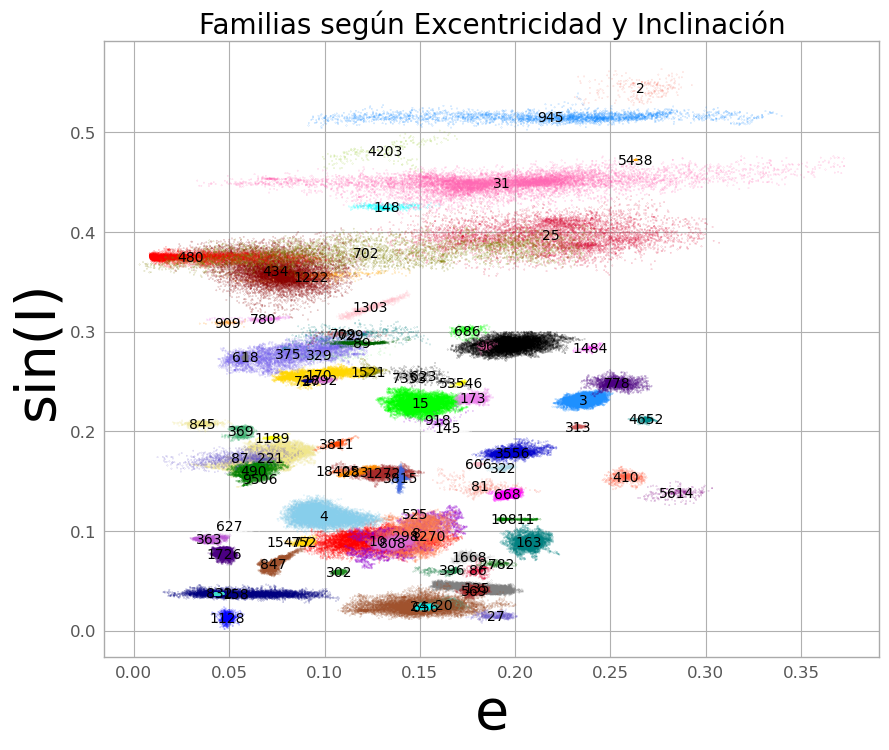

In [118]:
# Crear una figura y ejes para el gráfico

df_nuevos_asteroides['magn_abs'] = df_nuevos_asteroides['magn_abs'].astype(float)
df_nuevos_asteroides['prop_semi_maj_ax'] = df_nuevos_asteroides['prop_semi_maj_ax'].astype(float)
df_nuevos_asteroides['prop_ecc'] = df_nuevos_asteroides['prop_ecc'].astype(float)
df_nuevos_asteroides['sin_prop_incl'] = df_nuevos_asteroides['sin_prop_incl'].astype(float)



familias_unicas = np.unique(df_nuevos_asteroides['id_familia'])
familia_colores = {}
colores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'black', 
           'white', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'teal', 'silver', 'gold',
           'indigo', 'violet', 'coral', 'orchid', 'salmon', 'turquoise', 'khaki', 'sienna', 'crimson',
           'slateblue', 'darkgreen', 'darkorange', 'darkviolet', 'dodgerblue', 'forestgreen', 'hotpink',
           'indianred', 'lightblue', 'lightgreen', 'mediumblue', 'mediumorchid', 'mediumseagreen',
           'mediumslateblue', 'orangered', 'royalblue', 'seagreen', 'skyblue', 'tomato', 'yellowgreen',
           'darkred', 'darkcyan']

# Asignar colores a cada valor único de id_familia
for i, familia in enumerate(familias_unicas):
    familia_colores[familia] = colores[i % len(colores)]


df_2 = df_nuevos_asteroides.copy()

df_2.rename(columns={'magn_abs': 'Mag Abs'}, inplace=True)
df_2.rename(columns={'prop_semi_maj_ax': 'a'}, inplace=True)
df_2.rename(columns={'prop_ecc': 'e'}, inplace=True)
df_2.rename(columns={'sin_prop_incl': 'sin(I)'}, inplace=True)

colors = df_nuevos_asteroides['id_familia'].map(familia_colores)

s1= 'Mag Abs'
s2 = 'a'
s3 = 'e'
s4 = 'sin(I)'

l1= 'Magnitud Absoluta'
l2 = 'Semi Eje Mayor'
l3 = 'Excentricidad'
l4 = 'Inclinación'


def grafico(string1, string2, le1, le2):
    ds = df_2
    plt.figure(figsize=(10, 8))
    plt.scatter(ds[string1], ds[string2], s=0.01, c=colors)

    for familia in familias_unicas:
        df_familia = ds[ds['id_familia'] == familia]
        x_center = df_familia[string1].mean()
        y_center = df_familia[string2].mean()
        plt.text(x_center, y_center, familia, ha='center', va='center', fontsize=10)

    if string1 == 'a':
        plt.xlabel(str(string1) + ' [AU]', fontsize=40)
        plt.ylabel(str(string2), fontsize=40)
    elif string2 == 'a':
        plt.xlabel(str(string1), fontsize=40)
        plt.ylabel(str(string2) + ' [AU]', fontsize=40)
    else:
        plt.ylabel(str(string2), fontsize=40)
        plt.xlabel(str(string1), fontsize=40)
    plt.title('Familias según ' + str(le1) + ' y ' + str(le2), fontsize=20)
    plt.show()
    

nombres = ['Pallas', 'Juno', 'Vesta', 'Flora', 'Hygiea', 'Eunomia', 'Massalia', 'Themis', 'Phocaea', 'Euterpe', 
           'Euphrosyne', 'Terpsichore', 'Semele', 'Sylvia', 'Julia', 'Aegle', 'Hertha', 'Adeona', 'Gallia', 
           'Koronis', 'Erigone', 'Maria', 'Ino', 'Eos', 'Emma', 'Baptistina', 'Clarissa', 'Chaldaea', 'Phaeo', 
           'Svea', 'Padua', 'Aeria', 'Ursula', 'Aeolia', 'Chloris', 'Hungaria', 'Hansa', 'Veritas', 'Adelaide', 
           'Misa', 'Brangane', 'Elfriede', 'Chimaera', 'Charis', 'Beagle', 'Dora', 'Gersuind', 'Alauda', 
           'Fringilla', 'Nipponia', 'Watsonia', 'Sulamitis', 'Theobalda', 'Armenia', 'Merxia', 'Karin', 
           'Naema', 'Agnia', 'Ulla', 'Itha', 'Barcelona', 'Astrid', 'Terentia', 'Tina', 'Datura', 'Gefion', 
           'Luthera', 'Tirela', 'Postrema', 'Seinajoki', 'Hanna', 'Hoffmeister', 'Lucienne', 'Leonidas',
           'Lixiaohua', 'Karma', 'Konig', 'Brucato', 'Iannini', 'Lorre', 'Yakovlev', 'Kazuya', 'Telramund', 
           'Lau', '(1999 CG1)', '(1993 FY12)', '(2000 BY6)']

numeros = [2, 3, 4, 8, 10, 15, 20, 24, 25, 27, 31, 81, 86, 87, 89, 96, 135, 145, 148, 158, 163,
           170, 173, 221, 283, 298, 302, 313, 322, 329, 363, 369, 375, 396, 410, 434, 480, 490,
           525, 569, 606, 618, 623, 627, 656, 668, 686, 702, 709, 727, 729, 752, 778, 780, 808, 
           832, 845, 847, 909, 918, 945, 1128, 1189, 1222, 1270, 1272, 1303, 1400, 1484, 1521,
           1668, 1726, 1892, 2782, 3556, 3811, 3815, 4203, 4652, 5438, 5614, 7353, 9506, 10811, 
           15477, 18405, 53546]
numeros = list(map(str, numeros))
grafico(s2, s3, l2, l3)
grafico(s2, s1, l2, l1)
grafico(s1, s3, l1, l3)
grafico(s1, s4, l1, l4)
grafico(s2, s4, l2, l4)
grafico(s3, s4, l3, l4)

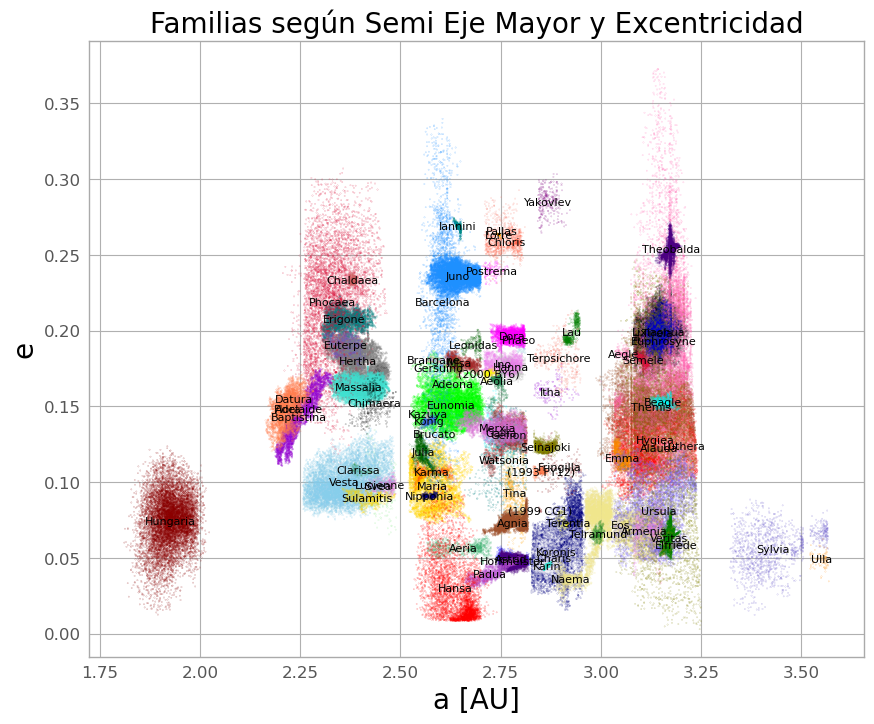

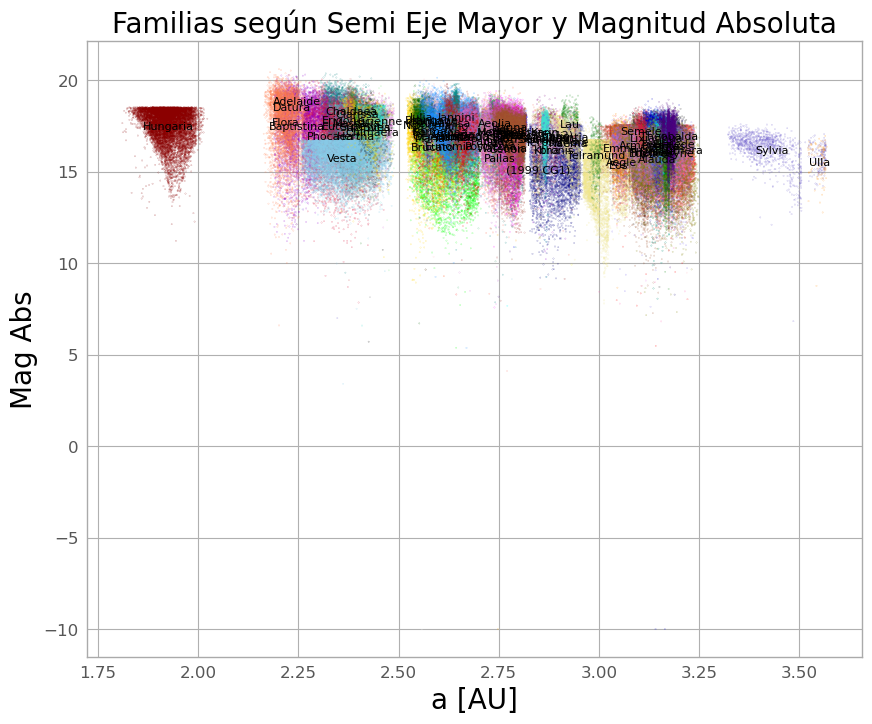

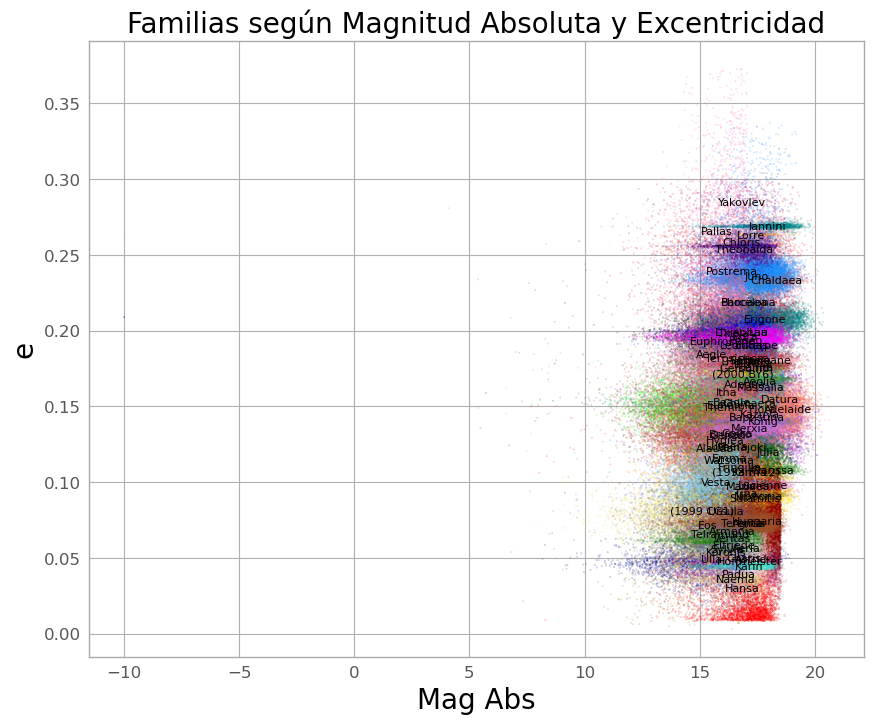

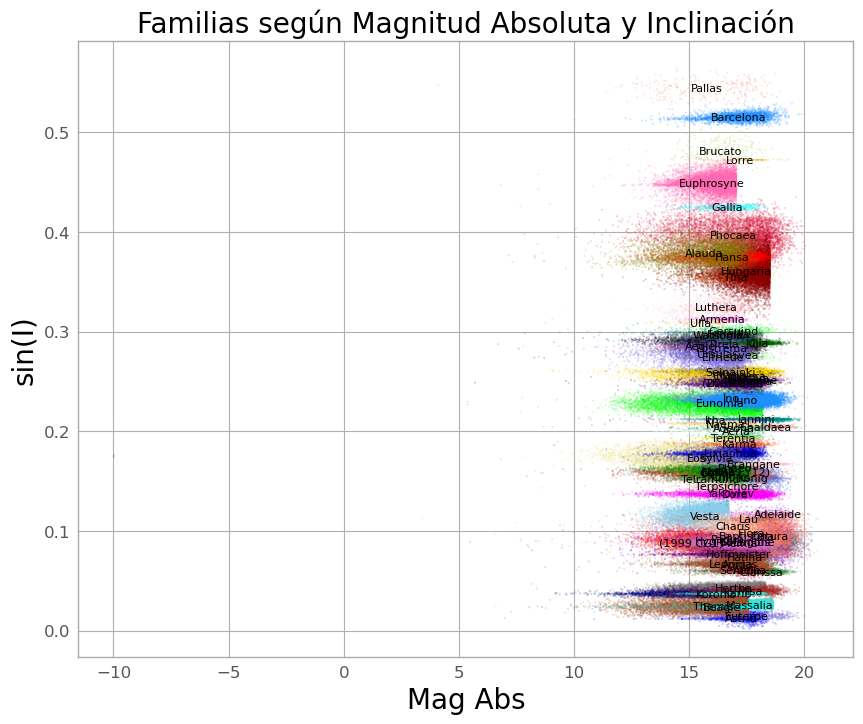

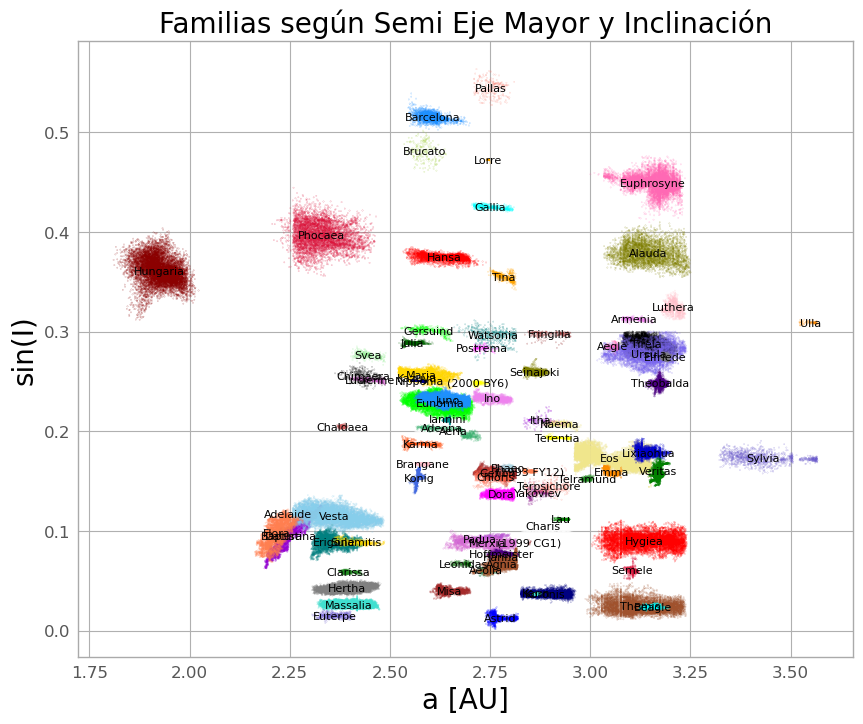

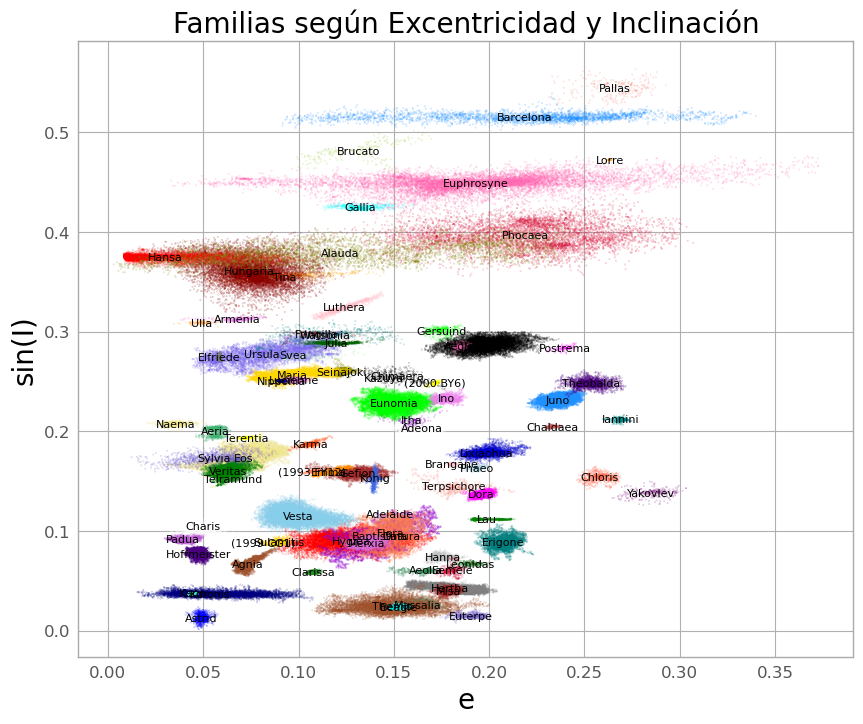

In [117]:
import matplotlib.pyplot as plt

def grafico2(string1, string2, le1, le2):
    ds = df_2
    plt.figure(figsize=(10, 8))
    plt.scatter(ds[string1], ds[string2], s=0.01, c=colors)

    for familia in familias_unicas:
        df_familia = ds[ds['id_familia'] == familia]
        x_center = df_familia[string1].mean()
        y_center = df_familia[string2].mean()
        
        if familia in numeros:
            nombre = nombres[numeros.index(familia)]
            plt.text(x_center, y_center, nombre, ha='center', va='center', fontsize=8)
        else:
            plt.text(x_center, y_center, familia, ha='center', va='center', fontsize=8)

    if string1 == 'a':
        plt.xlabel(str(string1) + ' [AU]', fontsize=20)
        plt.ylabel(str(string2), fontsize=20)
    elif string2 == 'a':
        plt.xlabel(str(string1), fontsize=20)
        plt.ylabel(str(string2) + ' [AU]', fontsize=20)
    else:
        plt.ylabel(str(string2), fontsize=20)
        plt.xlabel(str(string1), fontsize=20)
    plt.title('Familias según ' + str(le1) + ' y ' + str(le2), fontsize=20)
    plt.show()
grafico2(s2, s3, l2, l3)
grafico2(s2, s1, l2, l1)
grafico2(s1, s3, l1, l3)
grafico2(s1, s4, l1, l4)
grafico2(s2, s4, l2, l4)
grafico2(s3, s4, l3, l4)

In [56]:
data = {
    'design_aster': design_aster,
    'magn_abs': magn_abs,
    'prop_semi_maj_ax': prop_semi_maj_ax,
    'prop_ecc': prop_ecc,
    'sin_prop_incl': sin_prop_incl,
    'id_familia': id_familia
}

df = pd.DataFrame(data)
df


design_aster magn_abs prop_semi_maj_ax  prop_ecc sin_prop_incl  \
0             10811    12.51         2.929198  0.194354      0.110815   
1             84957    14.74         2.927062  0.191418      0.112621   
2            128117    14.96         2.925800  0.191591      0.112678   
3            302178    15.29         2.931542  0.200805      0.111752   
4             81805    15.35         2.924318  0.196484      0.111267   
...             ...      ...              ...       ...           ...   
303412     2020SU45    17.89         3.047768  0.183902      0.286128   
303413     2020MF26    17.97         3.066623  0.185450      0.282269   
303414     2019GS76    18.00         3.058512  0.185232      0.290606   
303415    2016AL134    18.02         3.068623  0.180955      0.284077   
303416    2015KD206    18.04         3.041076  0.187278      0.283841   

       id_familia  
0           10811  
1           10811  
2           10811  
3           10811  
4           10811  
...           ...  
303412         96  
303413         96  
303414         96  
303415         96  
303416         96  

[303417 rows x 6 columns]

In [52]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [57]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Obtener las features y la clase del DataFrame
features = df.iloc[:, 1:5].values
clase = df.iloc[:, 5].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, clase, test_size=0.2, random_state=42)

# Escalar los datos de las features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\3219470867.py", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\__init__.py", line 37, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\__init__.py", line 37, in <module>
    from tensorflow.python.eager import context
  File "C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\eager\context.py", line 33, in <module>
    from tensorflow.python import pywrap_tfe
  File "C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\pywrap_tfe.py", line 25, in <module>
    from tensorflow.python._pywrap_tfe import *
ImportError: DLL load failed while importing _pywrap_tfe: No s

In [ ]:
len(design_aster)

In [ ]:
design_aster[1000]

In [ ]:
query='''
SELECT *
FROM ss_ztf
WHERE
ssnamenr in (%s)
AND ssdistnr >= 0
ORDER BY ssnamenr
''' % ",".join(["'%s'" % name for name in design_aster[0:10]])
#ir de 1000 en 1000 (para que no me mate el timeout, para cancelacion de query)
#el profe dijo que me falta además agregar las diferentes columnas de los archivos
ss1 = pd.read_sql_query(query, conn)
#ss1

In [ ]:
len(ss1)

In [ ]:
#columna_candids = ss1['candid'].values

In [ ]:
columna_candids = ss1.loc[ss1['ssnamenr'] == '5', 'candid']
columna_candids

In [ ]:

query='''
SELECT *
FROM detection
WHERE
candid in (%s)
''' % ",".join(["'%s'" % candid for candid in columna_candids])
#ir de 1000 en 1000 (para que no me mate el timeout, para cancelacion de query)
detection = pd.read_sql_query(query, conn)
detection

In [ ]:
dets = detection
ss = ss1
colors = {1: 'g', 2: 'r'}
fig, ax = plt.subplots(figsize=(12,5))
for fid in dets.fid.unique():
  mask = (dets.fid == fid)
  ax.errorbar(dets.loc[mask].mjd, dets.loc[mask].magpsf, 
              yerr=dets.loc[mask].sigmapsf, c=colors[fid], label = "ZTF %s" % colors[fid])
ax.plot(dets.mjd, ss.loc[dets.index].ssmagnr, c='y', label='MPC V')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=18)
ax.set_ylabel("mag", fontsize=18)
ax.legend()

In [93]:
import numpy as np

# Arreglo de ejemplo
arr = np.array([1, 2, 3, 2, 1, 3, 2, 1, 1, 4, 4, 4, 4])

# Obtener los valores únicos y sus frecuencias


# Imprimir los elementos repetidos más de 9 veces
print("Elementos repetidos más de 9 veces:")
print(repeated_values)


Elementos repetidos más de 9 veces:
[1 2 4]


cantidad de objetos:  10


C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1147640734.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ss1 = pd.read_sql_query(query, conn)


['10811' '123872' '128117' '185340' '203721' '229247' '271337' '302178'
 '81805' '84957']


C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1147640734.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1147640734.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1147640734.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1147640734.py:33

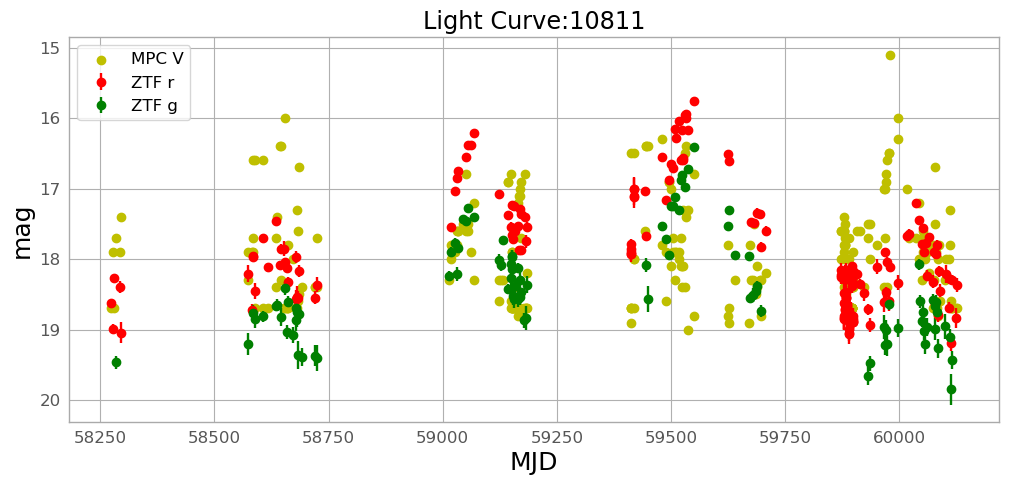

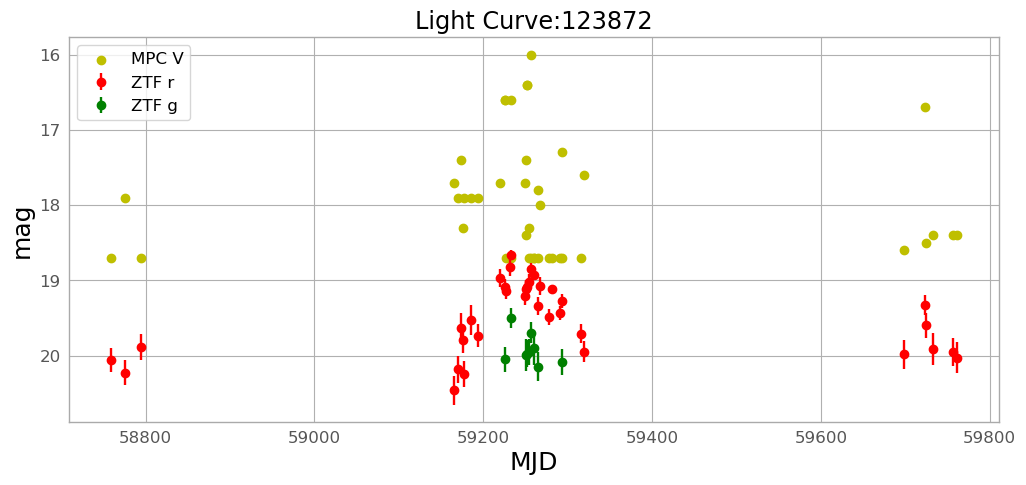

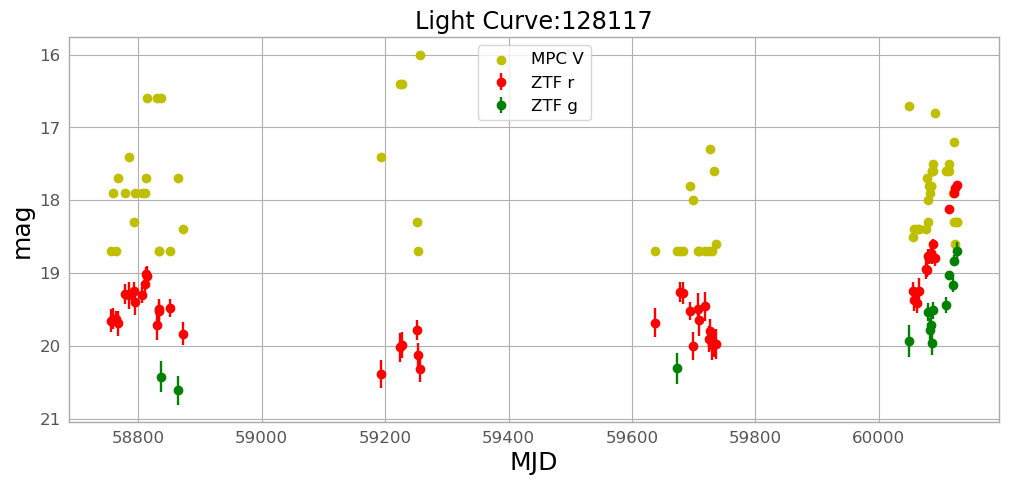

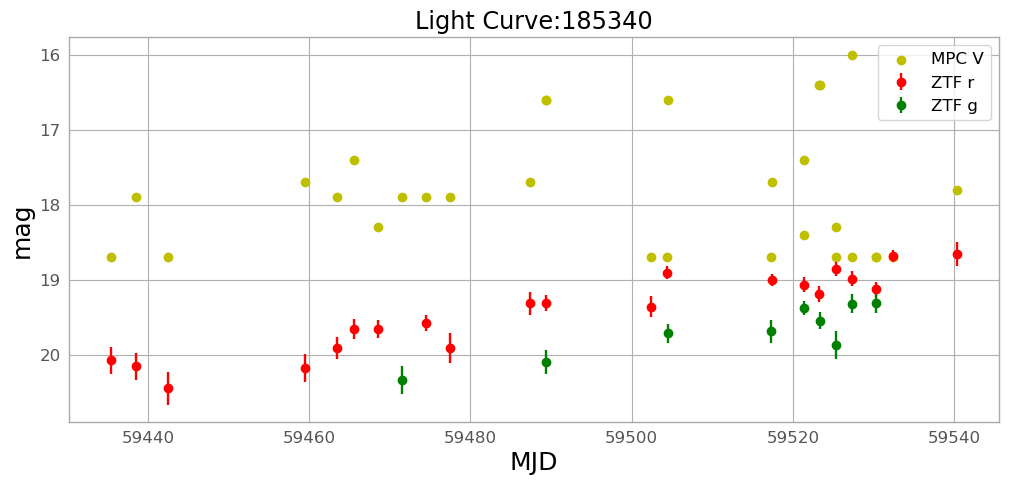

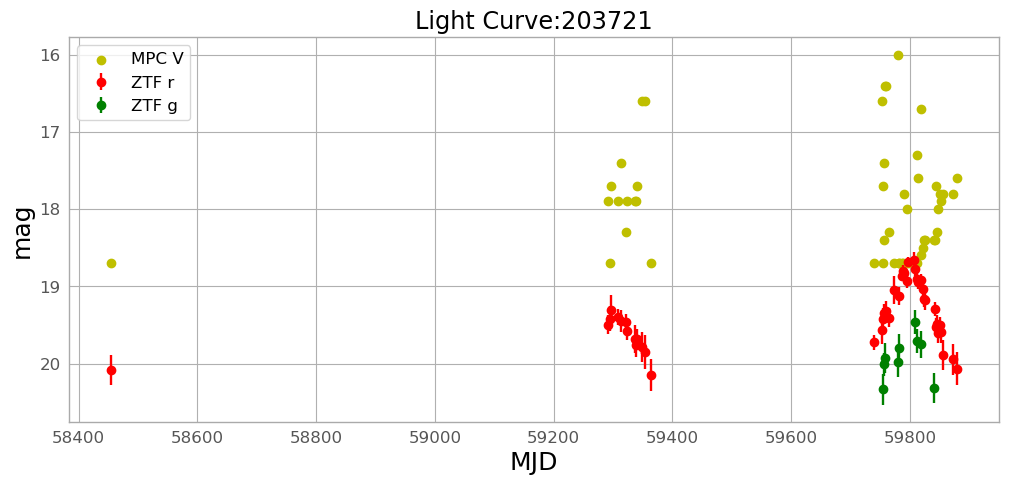

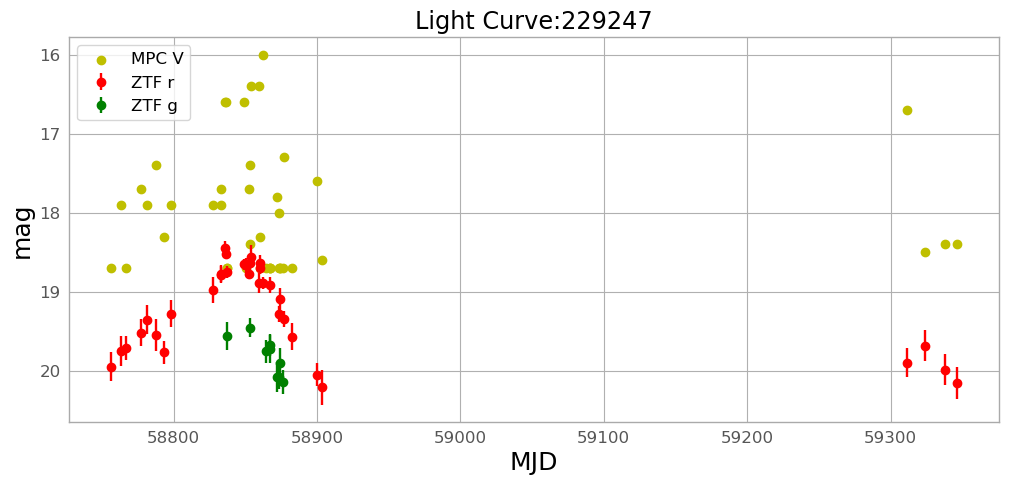

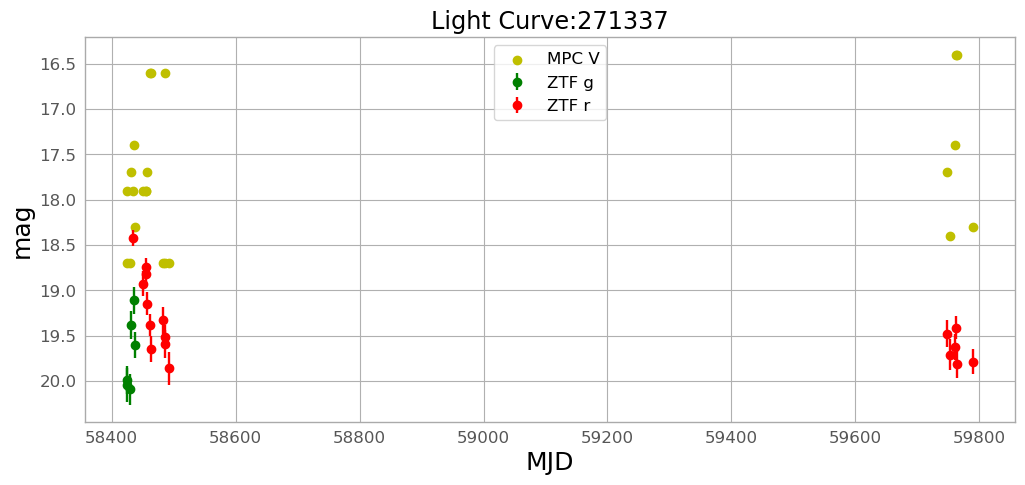

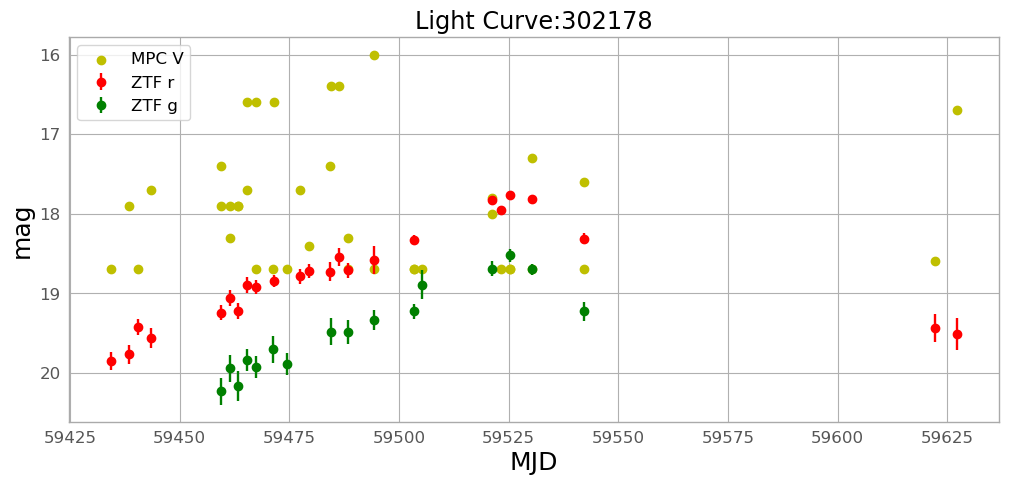

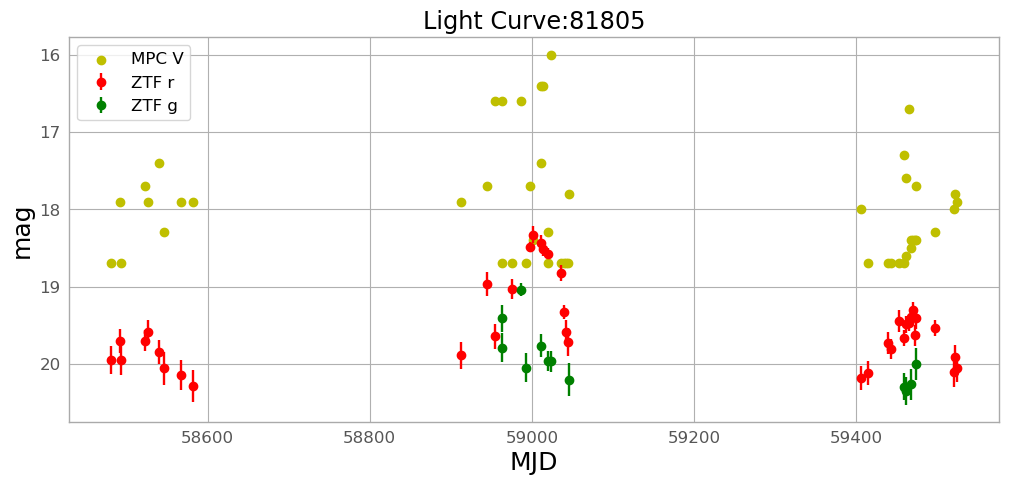

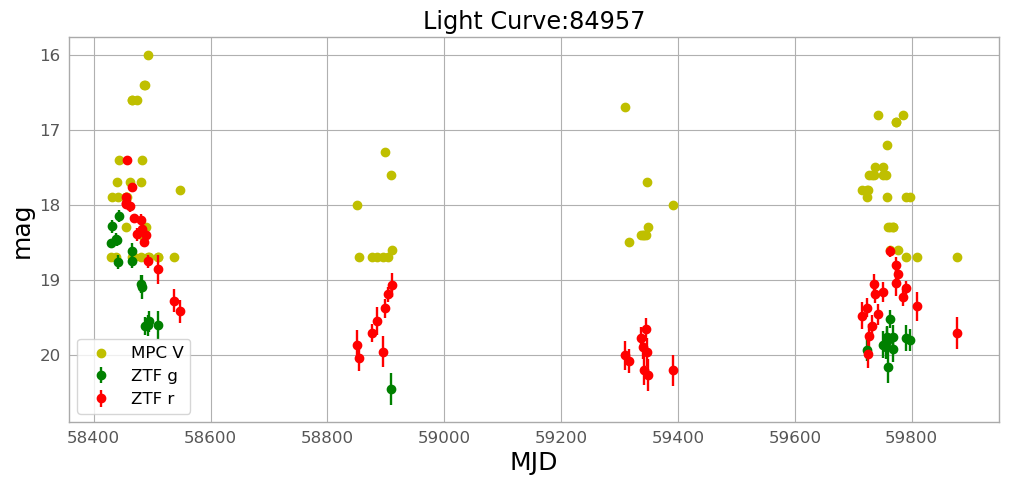

In [126]:
s = 1
O = np.linspace(0, s-1, num=s, dtype=int).tolist()
n = 10
print('cantidad de objetos: ',s*n)
for i in O:
    query='''
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr in (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    ''' % ",".join(["'%s'" % name for name in design_aster[n*i:n*(i+1)]])
    #ir de 1000 en 1000 (para que no me mate el timeout, para cancelacion de query)
    #el profe dijo que me falta además agregar las diferentes columnas de los archivos
    ss1 = pd.read_sql_query(query, conn)

    valores_unicos = ss1['ssnamenr']
    arr = np.array(valores_unicos)
    unique_values, counts = np.unique(arr, return_counts=True)
    valores = unique_values[counts > 14]
    print(valores)
    #indices = np.where(np.isin(arr, repeated_values))[0]
    for valor in valores:
        columna_candids = ss1.loc[ss1['ssnamenr'] == valor, 'candid']
        query='''
        SELECT *
        FROM detection
        WHERE
        candid in (%s)
        ''' % ",".join(["'%s'" % candid for candid in columna_candids])
        #ir de 1000 en 1000 (para que no me mate el timeout, para cancelacion de query)
        detection = pd.read_sql_query(query, conn)
        dets = detection
        ss = ss1
        colors = {1: 'g', 2: 'r',3:'orange'}
        fig, ax = plt.subplots(figsize=(12,5))
        
        for fid in dets.fid.unique():
          mask = (dets.fid == fid)
          ax.errorbar(dets.loc[mask].mjd, dets.loc[mask].magpsf, 
                      yerr=dets.loc[mask].sigmapsf, c=colors[fid], label = "ZTF %s" % colors[fid], fmt='o')
        ax.scatter(dets.mjd, ss.loc[dets.index].ssmagnr, c='y', label='MPC V')
        ax.set_title('Light Curve:'+ str(valor))#,cuenta[])
        ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_xlabel("MJD", fontsize=18)
        ax.set_ylabel("mag", fontsize=18)
        ax.legend()

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = 100
n = 10
batch_size = 1000

print('cantidad de objetos:', s * n)

for i in range(0, s * n, batch_size):
    batch_design_aster = design_aster[i : i + batch_size]

    # Consulta para obtener los datos en lote de la tabla "ss_ztf"
    query = '''
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr IN (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    ''' % ",".join(["'%s'" % name for name in batch_design_aster])

    ss1 = pd.read_sql_query(query, conn)

    # Consulta para obtener los datos en lote de la tabla "detection"
    candid_values = ss1['candid'].unique().tolist()
    query = '''
    SELECT *
    FROM detection
    WHERE
    candid IN (%s)
    ''' % ",".join(["'%s'" % candid for candid in candid_values])

    detection = pd.read_sql_query(query, conn)
    
    # Resto del código para el trazado de los gráficos
    valores_unicos = ss1['ssnamenr'].unique()
    
    for valor in valores_unicos:
        columna_candids = ss1.loc[ss1['ssnamenr'] == valor, 'candid']
        
        dets = detection[detection['candid'].isin(columna_candids)]
        ss = ss1[ss1['ssnamenr'] == valor]
        
        colors = {1: 'g', 2: 'r'}
        fig, ax = plt.subplots(figsize=(12,5))
        
        for fid in dets.fid.unique():
            mask = (dets.fid == fid)
            ax.errorbar(dets.loc[mask].mjd, dets.loc[mask].magpsf, 
                        yerr=dets.loc[mask].sigmapsf, c=colors[fid], label = "ZTF %s" % colors[fid])
        
        ax.plot(dets.mjd, ss.ssmagnr, c='y', label='MPC V')
        ax.set_title('Light Curve:'+ str(valor))
        ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_xlabel("MJD", fontsize=18)
        ax.set_ylabel("mag", fontsize=18)
        ax.legend()

plt.show()


cantidad de objetos: 1000


C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\1964139076.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ss1 = pd.read_sql_query(query, conn)


DatabaseError: Execution failed on sql: 
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr IN ('10811','84957','128117','302178','81805','203721','271337','229247','123872','185340','217711','131298','169938','183488','306831','256877','212296','265353','222108','321033','307034','295460','177022','2011WZ133','304593','394651','2016WT30','306930','421980','2007RD343','305754','307035','539550','2002EY167','367576','583684','307145','414547','2009OH19','334534','342967','504380','2008AL117','334920','576168','548975','299698','469240','2015NL22','430466','407147','431502','202860','436630','334491','473083','2019CB6','361248','475434','357910','198670','340492','455992','489386','539316','412308','595528','377920','407159','446496','544391','238800','2005WU57','2004FP175','474270','412615','434415','2016NS86','568340','2004RU260','2011WR110','549305','611582','275696','453942','2015AH70','2013YV143','505004','519777','2014SJ251','299876','410599','460278','349364','271730','355671','581179','496798','2006EY47','2016WB29','573344','2017HY32','391554','2016UA54','2014QP268','2016XW8','2006KF97','2017UX105','396991','413694','598980','502441','533039','392150','564146','579040','2006AH93','2014SO187','564693','2011UQ268','451948','532667','549255','504326','2012AW25','2017BS20','2007TS85','2007HF110','537536','583940','1997SS14','447256','2007VC147','2011BM168','299825','450028','471839','537464','405405','494248','2014OS25','431917','2008YA35','2004TC374','2021RO177','456049','609750','2002QH150','2006WX215','2017BM60','467464','2006SU224','2013PJ114','2013QW2','557432','2008KS19','2003WQ206','2012PN39','2012SV87','2016VA30','2009SQ313','471177','546117','595527','2019GU17','2015BD575','2021RF148','577764','2007YZ79','473679','550501','2011YV95','2008RH165','450429','2016NN3','2015DX43','2016LX96','2015VD34','2014WK207','384114','2016NS60','2007YU92','2010UO32','2015KD66','2017TY34','2014WU569','467903','547827','571496','2013WM121','573969','2014OX91','2004FN174','593224','389200','2014GD28','2016XP34','2018LH33','2016EG262','516640','519478','2016MB5','2009FQ82','2015GT42','2019AW97','2021PE61','513785','2010FF4','2015BS222','528317','2007SC28','2016AQ90','2016XW18','558648','2008UV66','2015XF415','2015XX391','2007LJ27','2014FS79','2015PP161','2014NZ17','2021NV40','2002QC157','2014ST355','2017SO256','611652','2006CG52','2014UW236','2015BH598','2015LM33','2017DZ31','2011UU485','2013AW78','2015BG588','2013ON18','2010TB193','2015PQ313','2007FC27','2017RA113','2013NB7','2012PQ44','2013XO39','2014QP314','581316','2014TS98','558960','2012WS16','2015TK386','581345','2018AQ7','2012FC87','2016FV31','2011OR21','2013PK81','2012XO161','2016NK125','414589','2013EM165','2014WB544','2015BJ600','2007RE55','2013NO59','554583','2007JQ50','2013YM86','2015OT66','523467','576535','2017AS46','2018PO78','2016WG71','2016XC37','2017BQ64','2019GQ63','2007TO469','2014UB227','2020DM5','2007HC61','2015XZ74','2006WH116','2012UK234','516634','2012FE32','2012HF91','2014MQ88','2015SF13','2016OR13','2006KX154','2012TZ226','2016FE10','2018PV51','2015XL469','2015BN532','2012QZ32','594260','2014PK68','2016AF29','2003YL188','2008WL114','420816','507478','2011LK22','2012SU16','2015MX72','2014SG127','602388','2006RM43','2011BZ67','2011RN24','2014MY88','2002QV103','2015BA31','2015PN36','2010VK196','2014HG119','2014KB103','2004GJ90','2018VX62','2007TC455','2013RR122','461824','2018YL9','2014HR207','2019AB86','2012BS142','2015AA134','2015BH429','528954','579020','2012HC90','2020LZ12','2013CU251','2014QR279','2013BN34','2022AK18','2019UQ127','2013VT43','2014BU73','2008WU165','2016NU146','509547','2006YB69','2014UM64','2007RA337','2011GU106','2012TJ277','2013YE160','2014KQ149','2017FM179','2016RC7','2012XZ64','2014SH307','2008QX','2008ST348','2016CN274','2017SR207','498127','2018FY35','2007TB459','2008CE141','2014UQ264','2008WE22','2020PG26','2012TM326','2015XJ468','2016GJ28','2006US252','2007DS132','2016TH179','2008EY66','2014GY71','2019YJ27','2013YQ19','2012FE114','2015TS439','2010UX75','2011QD87','2007TQ48','2013LA39','2016RU83','2020JK39','2014BD16','2010DE112','2015FF396','2016CL324','2016PR152','2010UK113','2015KH107','2017BQ157','2007WW22','2014GW24','2014WC39','2008UQ414','2004CM9','2005WE22','2015BK349','2005VD46','2019QW32','2017BZ199','2006UO57','2015PL88','2017AQ54','2006HF159','2014WN433','2006UB29','2015KF96','2013PB125','2016AY2','2016CU6','2019AY69','2019KW42','2010RL213','2016EQ313','612133','2013OO16','2014TL99','2015QN12','2006QE201','2016EO305','2006BH88','2013RQ59','2014OY34','2017FJ211','2019RF25','2016NO152','2013UQ38','2014GR70','2021UD98','2005VV131','2013UA41','2016NY138','2020HS142','2015TZ73','2019SO33','2014QD203','2014SE150','2015OH132','2015SU45','2010FP143','2014KM132','2014OX418','2012SO76','2014WQ307','474275','2011UZ10','2016KK13','2017HO93','2015BM554','2014XL49','2019SL18','2014OJ375','2011SG340','2017DC132','2012UM47','2003SD465','2016CE208','2016GV300','2015BH616','2015XP461','2016PW209','2017OS86','2011HN111','2015UZ101','2016GB306','2015LG23','2012UZ100','2014QY247','2015FQ442','2008FE148','2011ER103','2015TG290','2014UA178','2020JH14','2011UO381','2014WS571','2015XV105','2016EP313','2016QU133','2014NW86','2015QX26','2006SF118','2015FZ458','2016CK390','2011SN176','2011UO463','2014WQ323','2019GX72','2011UB232','2020MP27','2014OV289','2016WP14','2015HJ223','2015JX20','2006UG387','2016GL138','2011QB80','2011RU35','2014SM49','2017HK65','2019QF23','1999VS152','2015PJ196','2020TL70','2014JO124','2014OO425','2015XO472','2016ES298','2009DX133','2010RG211','2012UO159','2013AE205','2016AX350','2007TT327','2014KP122','2016QS145','2007QD19','2015BY83','2013HY44','2008TP234','2013PJ118','2016NW148','2017DN148','2008SN349','2015BR108','2021NH38','2021NY51','2003WD214','2005VZ22','2014UJ280','2014WY309','2014RU67','2011UP240','2014QQ506','2014TV101','2011VC35','2013VL57','2015RA361','2015XM473','2010PJ91','2014SP25','2015LX59','2018NT43','2004TG59','2010TN235','2015BS469','2013DY20','2014UN166','2015TX454','2016EO299','2016PA218','2017SM65','2016RE84','2016GZ323','2020PB47','2010TA223','2016FR91','2014QX381','2015TF449','2011RM37','1999WL25','2016QW139','2014QY531','2009UG173','2015RO131','2017BY200','2013NE63','2014KH121','2015BZ363','2011UQ484','2015SS52','2011SL146','2016UG129','2015HS231','2014QL513','10','100','211','108','159','577','1107','1109','1209','1200','1599','5480','1561','1491','867','1611','5116','5295','4848','3319','2436','3626','7366','5155','8330','5715','8150','8354','8409','9544','2615','9043','4530','12046','29254','10817','11029','16449','4687','6415','17117','8128','8814','11132','12554','8834','16153','10623','10316','8429','6644','21583','6385','8839','20740','20402','5794','7847','12759','14867','20410','26625','10628','10809','14822','16450','20960','8746','23072','45381','16622','9164','15191','6575','36222','6688','7279','47556','9411','13322','4054','11766','11995','16922','8203','13986','29540','21873','22703','5265','7856','8680','11381','16200','17853','19713','20063','10396','17470','20546','10806','14479','12898','20547','9918','29577','10540','14265','20997','25829','34635','6654','8473','15134','16181','16454','20622','26719','33267','12549','15050','16623','19702','24958','45643','38554','14740','23442','24653','8489','12566','22700','12493','15767','16093','25804','27195','8622','15753','17571','29410','20660','33770','16509','16314','28875','62330','8621','12292','17087','24962','17692','18727','18366','21019','24358','35651','15770','19074','21223','22062','23095','8696','18941','36086','61935','11758','36212','10695','15005','12133','14015','15945','19870','61924','13227','8678','16569','20509','22662','11306','23916','27370','36219','46743','51889','51210','60208','46250','23001','27624','60153','24956','14170','15058','20989','86088','14176','29848','16988','48817','51214','51859','7115','8601','21835','25803','28933','31659','34260','34352','38567','67210','36878','11753','12108','26185','31274','45734','59452','62412','16607','27915','67190','27157','28002','31211','47600','11071','18566','22965','35340','40195','30682','32808','61582','23703','34420','36228','41585','56889','69919','87879','91720','20414','36226','40132','44508','45306','47949','12542','22241','25777','34749','35093','36241','47534','51158','51241','67817','14077','38605','106168','18703','36221','38041','51894','17337','22652','24167','27728','36232','61789','74470','24199','31583','33286','60926','91613','33404','49605','66138','11972','18558','60902','15052','25651','38541','49604','8629','17691','17848','25245','25826','41356','47102','13267','29860','34793','48715','69904','78741','11588','20695','35557','36083','40220','45556','15755','29414','41480','55334','60258','63542','17316','45758','54396','73757','31079','55256','71505','23070','24194','30441','34818','43214','44500','55306','22434','40119','106415','8136','11115','30639','62297','9441','19867','31712','49611','50996','77775','23132','33932','42772','61595','62053','8623','8758','13456','34940','35350','48177','83031','86070','104663','18452','22198','32364','32391','51906','59854','67191','77888','8798','29965','35655','50999','52693','61438','68283','106297','13313','31255','41058','41166','42240','44568','50414','51913','62770','62846','82463','22344','31321','41613','12287','17195','31707','39034','40426','71497','74507','28040','33200','34828','41012','48339','55307','71608','21811','26877','43267','47892','51953','63183','13753','18894','22664','29120','32197','34987','40242','48482','50582','78142','12780','18565','33196','43770','52707','66085','30908','31726','71628','97717','36785')
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

unable to rollback

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import time

# Establecer una conexión a la base de datos
s = 10
n = 100
batch_size = 1000

# Lista para almacenar los resultados de las consultas en lotes
batch_results = []

# Contador de asteroides graficados
asteroides_graficados = 0

for i in range(0, s * n, batch_size):
    batch_design_aster = design_aster[n*i:n*(i+batch_size)]

    # Consulta para obtener los datos en lote de la tabla "ss_ztf"
    query = '''
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr IN (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    ''' % ",".join(["'%s'" % name for name in batch_design_aster])

    while True:
        try:
            batch_results.append(pd.read_sql_query(query, conn))
            asteroides_graficados += len(batch_design_aster)  # Aumentar el contador
            break  # Salir del bucle while si la consulta se completó con éxito
        except Exception as e:
            # Manejar el error de tiempo de espera de la consulta
            print("Se produjo un error al ejecutar la consulta:", e)
            print("Esperando 5 segundos antes de volver a intentar...")
            time.sleep(5)  # Esperar 5 segundos antes de volver a intentar la consulta

# Combinar los resultados de las consultas en lotes en un único DataFrame
ss1 = pd.concat(batch_results)

# Obtener los valores únicos de 'ssnamenr' en el DataFrame combinado
valores_unicos = ss1['ssnamenr'].unique()

# Consulta para obtener todos los datos de 'detection' en una sola consulta utilizando un JOIN
query = '''
SELECT *
FROM detection
WHERE
candid IN (
    SELECT candid
    FROM ss_ztf
    WHERE
    ssnamenr IN (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
)
''' % ",".join(["'%s'" % valor for valor in valores_unicos])

while True:
    try:
        detection = pd.read_sql_query(query, conn)
        break  # Salir del bucle while si la consulta se completó con éxito
    except Exception as e:
        # Manejar el error de tiempo de espera de la consulta
        print("Se produjo un error al ejecutar la consulta:", e)
        print("Esperando 5 segundos antes de volver a intentar...")
        time.sleep(5)  # Esperar 5 segundos antes de volver a intentar la consulta

# Resto del código para el trazado de los gráficos
for valor in valores_unicos:
    columna_candids = ss1.loc[ss1['ssnamenr'] == valor, 'candid']
    dets = detection[detection['candid'].isin(columna_candids)]
    ss = ss1[ss1['ssnamenr'] == valor]

    colors = {1: 'g', 2: 'r'}
    fig, ax = plt.subplots(figsize=(12,5))

    for fid in dets.fid.unique():
        mask = (dets.fid == fid)
        ax.errorbar(dets.loc[mask].mjd, dets.loc[mask].magpsf,
                    yerr=dets.loc[mask].sigmapsf, c=colors[fid], label="ZTF %s" % colors[fid])

    ax.plot(dets.mjd, ss.loc[dets.index].ssmagnr, c='y', label='MPC V')
    ax.set_title('Light Curve:'+ str(valor))
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("MJD", fontsize=18)
    ax.set_ylabel("mag", fontsize=18)
    ax.legend()

plt.show()

print("Se alcanzaron a graficar", asteroides_graficados, "asteroides.")


C:\Users\Acer\AppData\Local\Temp\ipykernel_7876\3277487092.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  batch_results.append(pd.read_sql_query(query, conn))


Se produjo un error al ejecutar la consulta: Execution failed on sql '
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr IN ('10811','84957','128117','302178','81805','203721','271337','229247','123872','185340','217711','131298','169938','183488','306831','256877','212296','265353','222108','321033','307034','295460','177022','2011WZ133','304593','394651','2016WT30','306930','421980','2007RD343','305754','307035','539550','2002EY167','367576','583684','307145','414547','2009OH19','334534','342967','504380','2008AL117','334920','576168','548975','299698','469240','2015NL22','430466','407147','431502','202860','436630','334491','473083','2019CB6','361248','475434','357910','198670','340492','455992','489386','539316','412308','595528','377920','407159','446496','544391','238800','2005WU57','2004FP175','474270','412615','434415','2016NS86','568340','2004RU260','2011WR110','549305','611582','275696','453942','2015AH70','2013YV143','505004','519777','2014SJ251','299876','410599','460278'

Se produjo un error al ejecutar la consulta: Execution failed on sql '
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr IN ('10811','84957','128117','302178','81805','203721','271337','229247','123872','185340','217711','131298','169938','183488','306831','256877','212296','265353','222108','321033','307034','295460','177022','2011WZ133','304593','394651','2016WT30','306930','421980','2007RD343','305754','307035','539550','2002EY167','367576','583684','307145','414547','2009OH19','334534','342967','504380','2008AL117','334920','576168','548975','299698','469240','2015NL22','430466','407147','431502','202860','436630','334491','473083','2019CB6','361248','475434','357910','198670','340492','455992','489386','539316','412308','595528','377920','407159','446496','544391','238800','2005WU57','2004FP175','474270','412615','434415','2016NS86','568340','2004RU260','2011WR110','549305','611582','275696','453942','2015AH70','2013YV143','505004','519777','2014SJ251','299876','410599','460278'

KeyboardInterrupt: 